# Regressão 01 - tarefa 03 - transformações em X e Y

In [4]:
#carregando pacotes
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [5]:
#carregando base de gorjetas 
tips = sns.load_dataset("tips")

#adicionando novas colunas: porcentagem de gorjeta e valor da conta sem gorjeta.
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [6]:
#1) criando a matriz de desing, para melhor visualização da matriz, iremos utilizar apenas as 5 primeiras linhas do DataFrame.

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5]) #+1 se dá para calcular o intercepto. 
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

Com o modelo abaixo, analisaremos 'P>|t|' que nos mostra a significancia das variáveis, valores até 5% mostram variáveis a considerar, além disso, são var menos significantes para explicar o nosso y. Agora para fins de criação de modelo, usarei todas as linhas do DataFrame. Teremos um modelo aonde a variável tip é explicada por sex, smoker, time e net_bill:

In [8]:
modelo= smf.ols('tip ~ sex + smoker + time + net_bill + 1', data = tips).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           2.64e-20
Time:                        05:47:57   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o sumário do sumário acima percebemos que as nossas variáveis explicam 33,5% do modelo. E com base no P>|t| percemos que a única variável que é signigicante, muito significante, é net_bill.

In [10]:
#2) Excluindo do modelo sex, smoker e time 
modelo= smf.ols('tip ~ net_bill + 1', data = tips).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           5.02e-23
Time:                        05:56:28   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Obviamente o nosso R-quadrado diminuiu um pouco, porque ele realmente tende a diminuir conforme diminui-se o nº de variáveis explicativas, mas tudo bem pois as outras variáveis não explicavam muita coisa mesmo, visto que a diminuição do R-quadrado foi quase irrelevante. 

In [13]:
#3)salvando o resíduo do modelo acima em uma nova coluna no nosso dataFrame:
tips['residuo']=modelo.resid

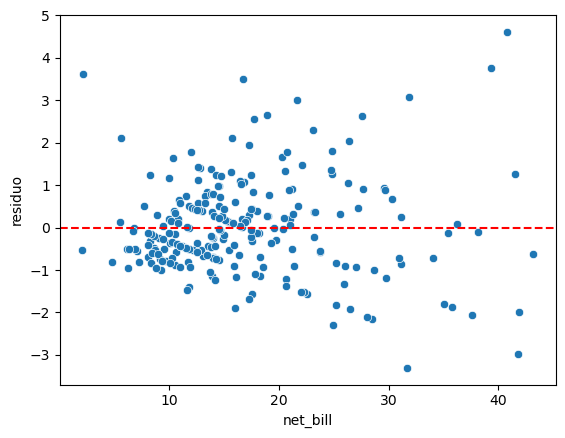

In [14]:
#exibindo o gráfico do resíduo por net_bill
sns.scatterplot(x = 'net_bill', y = 'residuo', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

INCIANDO TRANSFORMAÇÕES NA NOSSA BASE, COM LOG E POLINÔMIO:

In [21]:
#4) TRANSFORMANDO NET_BILL PARA LOG
modelo2= smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           4.40e-20
Time:                        06:03:04   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#salvando o resíduo do modelo acima em uma nova coluna no nosso dataFrame:
tips['res_log_net_bill']=modelo2.resid

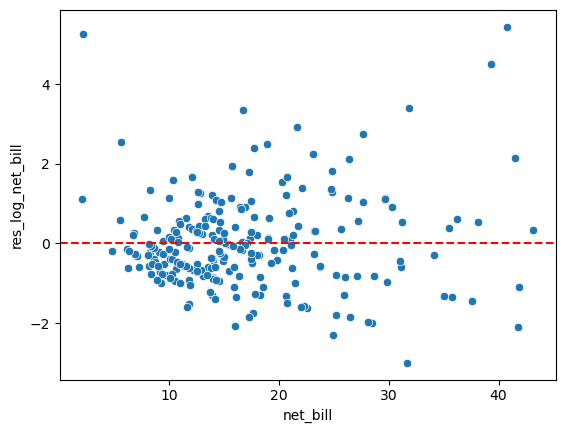

In [23]:
#plotando o gráfico do resíduo do modelo 2 por net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log_net_bill', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O nosso modelo 2 obteve um R-quadrado menor que o primeiro modelo realizado, por hora, preferimos o primeiro modelo. Mas vamos testar a transformação de net_bill para polinômio.

In [31]:
#4.1 transformando net_bill em polinômio:
modelo3 = smf.ols('tip ~  net_bill + np.power(net_bill,2)', data = tips).fit()
modelo3.summary

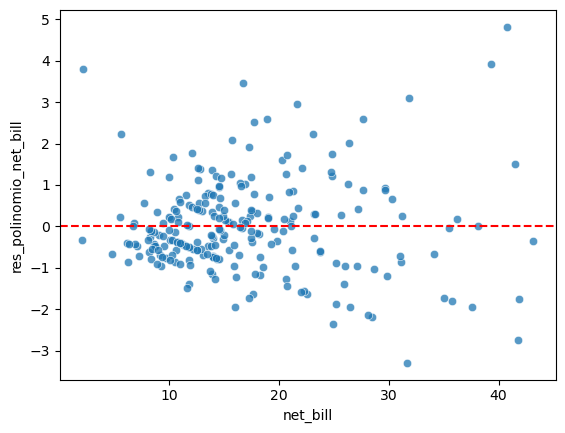

In [32]:
#salvando o resíduo do modelo acima em uma nova coluna no nosso dataFrame:
tips['res_polinomio_net_bill'] = modelo3.resid

#plotando o gráfico do resíduo do modelo 3 por net_bill
sns.scatterplot(x = 'net_bill', y = 'res_polinomio_net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

O modelo que nos trouxe um melhor R-quadrado foi o modelo3 onde transformamos net_bill (variável explicativa de tip para polinômio. Portanto, esse é o modelo escolhido.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [33]:
#1) criando a matriz de log de tip explicada por sex, smoker, time e net_bill - utilizando 5 primeiras linhas apenas para facilitar a visualização

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', tips[:5]) #+1 se dá para calcular o intercepto. 
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [34]:
#2) analisando quais variáveis não são significantes para posteriormente removê-las (utilizando todas as linhas do nosso df)
modelo4= smf.ols('np.log(tip) ~ sex + smoker + time + net_bill + 1', data = tips).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.21e-18
Time:                        06:16:21   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#2.1) Removendo todas as variáveis não significantes, deixando portanto, apenas net_bill, que tem total relevância. 
modelo4= smf.ols('np.log(tip) ~ net_bill + 1', data = tips).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           2.60e-21
Time:                        06:16:36   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#3)criando uma nova variável no data frame para guardar o redíduo de log de tip x net_bill
tips['res_log_tip']=modelo4.resid

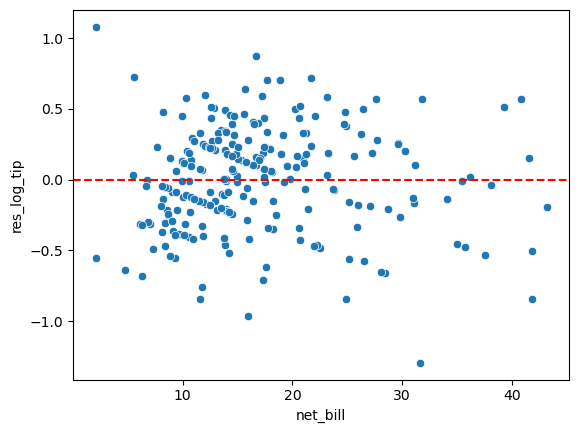

In [39]:
#3.1)observe o gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Observando o gráfico podemos ter uma base de quanto é 31% de explicação da nossa variável, muito se concentra em -0,5 e +0,5 no resíduo do modelo.

In [38]:
#4)teste transformar net_bill em log
modelo5= smf.ols('np.log(tip) ~ np.log(net_bill) + 1', data = tips).fit()
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           5.62e-22
Time:                        06:20:44   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
tips['res_log_tip_e_net_bill']= modelo5.resid

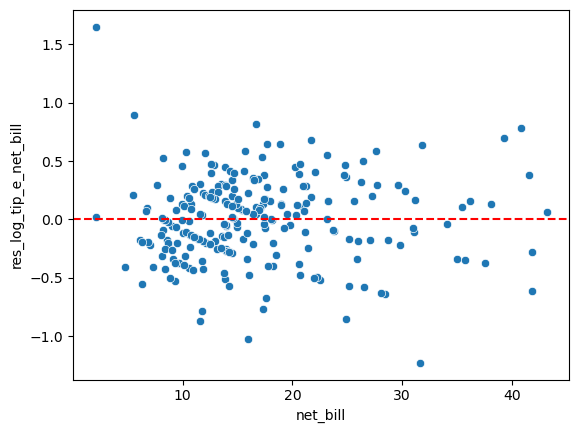

In [61]:
#4.1)observe o gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log_tip_e_net_bill', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [41]:
#4.2) TRANSFORMANDO NET_BILL EM POLINÔMIO, ENQUANTO TIP É LOG
modelo6 = smf.ols('np.log(tip) ~  net_bill + np.power(net_bill,2)', data = tips).fit()
modelo6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           2.82e-22
Time:                        06:25:58   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.